In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import torch
from torch.autograd import Variable

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

In [2]:
from pyq.core.quantization.functional import (PACTQuantizeFunction,
                                              STEQuantizeFunction, STEOffsetQuantizeFunction, 
                                              LSQQuantizeFunction, LSQPlusQuantizeFunction)


In [3]:
def plot_function_vs_derivative(torch_function, 
                                min_threshold, 
                                max_threshold, 
                                is_offset_applied=False, 
                                sample_points=1000):
    ws = []
    wqs = []
    scale_grads = []
    if is_offset_applied:
        offset_grad = []
    points = np.linspace(min_threshold - 2, max_threshold + 3, num=sample_points)
    for i in points:
        weight = Variable(torch.Tensor([i]), requires_grad=True)
        scale = torch.ones(1, requires_grad=True)
        if is_offset_applied:
            offset = torch.zeros(1, requires_grad=True)
        ws.append(weight.data[0])
        if is_offset_applied:
            w_q, _ = torch_function.apply(weight, scale, offset, min_threshold, max_threshold)
        else:    
            w_q, _ = torch_function.apply(weight, scale, min_threshold, max_threshold)
        wqs.append(w_q.data[0].numpy())
        w_q.backward(retain_graph=True)
        scale_grads.append(scale.grad.numpy())
        if is_offset_applied:
            offset_grad.append(offset.grad.numpy())
    
    #define subplots
    ax = plt.figure().gca()
    
    plt.plot(ws, wqs, "_", color="royalblue", label='{}'.format(torch_function.__name__))
    plt.plot(ws, scale_grads, "--", color="navy", label='{} Scale Derivative'.format(torch_function.__name__))
    if is_offset_applied:
        plt.plot(ws, offset_grad, "-", color="cornflowerblue", label='{} Offset Derivative'.format(torch_function.__name__))
    plt.xticks(range(min_threshold - 1, max_threshold + 3))
    plt.legend(loc="upper left")    
    ax.grid(linestyle=':', linewidth=1)    
    plt.show()

## Initialize the variables

In [4]:
bits = 2
min_threshold = - 2 ** bits
max_threshold = 2 ** bits

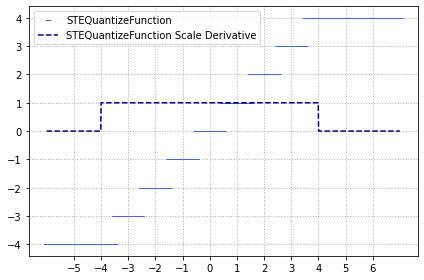

In [5]:
plot_function_vs_derivative(STEQuantizeFunction, min_threshold, max_threshold)

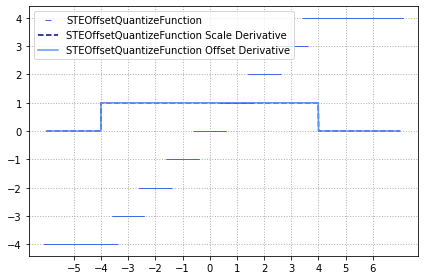

In [6]:
plot_function_vs_derivative(STEOffsetQuantizeFunction, min_threshold, max_threshold, is_offset_applied=True)

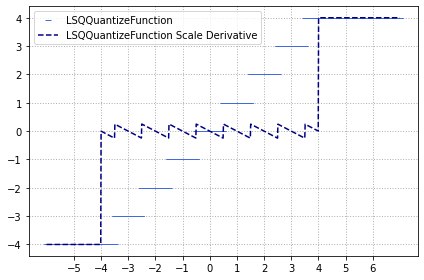

In [7]:
plot_function_vs_derivative(LSQQuantizeFunction, min_threshold, max_threshold)

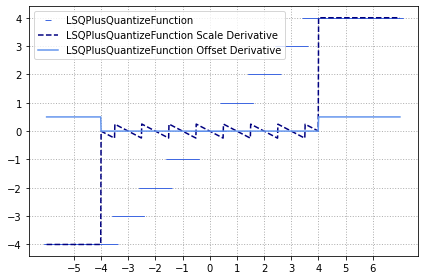

In [8]:
plot_function_vs_derivative(LSQPlusQuantizeFunction, min_threshold, max_threshold, is_offset_applied=True)

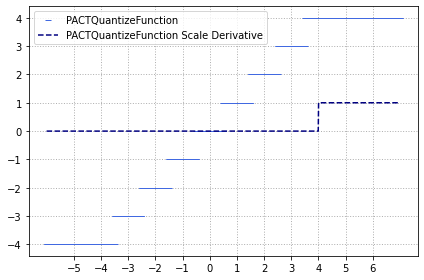

In [9]:
plot_function_vs_derivative(PACTQuantizeFunction, min_threshold, max_threshold)